# CMPE 548 HW1

# Question 1

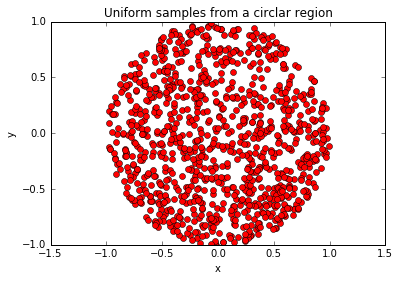

In [4]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#QUESTION 1
N = 1000 #number of samples
##########################
#generate sample for R
R = []

for i in range(N):
    R.append(math.sqrt(random.uniform(0,1)))

##########################    
#generate sample for theta
theta = []

for i in range(N):
    theta.append(random.uniform(0,2*math.pi))

##########################    
#convert R and theta to x y coordinates
x = []
y = []

for i in range(N):
    x.append(R[i]*math.cos(theta[i]))

for i in range(N):
    y.append(R[i]*math.sin(theta[i]))

##########################    
#plot sample points
fig1 = plt.figure(0)
plt.plot(x,y,'ro')
#plt.axis([-1.2, 1.2, -1.2, 1.2])
plt.axis('equal')
plt.title('Uniform samples from a circlar region')
plt.xlabel('x')
plt.ylabel('y')
plt.draw()
fig1.savefig('uniformsample.eps')

# Question 2

The accept rate for the case p = 1.5 is 0.879.

The accept rate for the case p = 0.7 is 0.392.

The accept rate for the case p = 0.7 where the samples are drawn from the new region is 0.648.



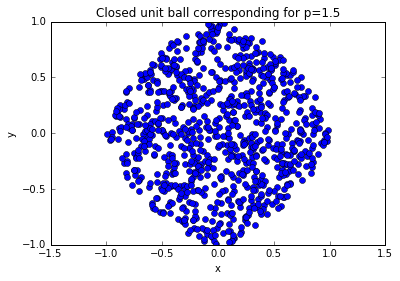

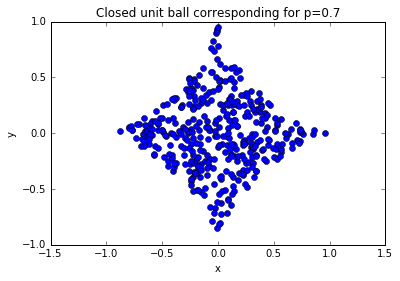

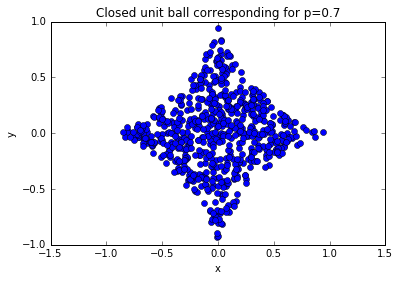

In [2]:
def abs(x):
    return math.fabs(x)

def p_norm(x,y,p):
    return math.pow((math.pow(abs(x),p) + math.pow(abs(y),p)),(1/p))

def accept(p_nrm):
    if p_nrm <= 1:
        return 1
    else:
        return 0
    
def newaccept(x,y):
    if  (abs(x)+abs(y)) <= 1:
        return 1
    else:
        return 0
    
#QUESTION 2
p = [1.5, 0.7, 0.7]
accept_rate = [0, 0, 0]

#############################################
#draw samples from the closed unit ball p
accepted_samplesx = []
accepted_samplesx.append([]) #p=1.5
accepted_samplesx.append([]) #p=0.7
accepted_samplesx.append([]) #p_0.7 part 2

accepted_samplesy = []
accepted_samplesy.append([]) #p=1.5
accepted_samplesy.append([]) #p=0.7
accepted_samplesy.append([]) #p=0.7 part 2 

#############################################
for j in range(2):
    for i in range(len(x)):
        if (accept(p_norm(x[i],y[i],p[j])) == 1):
            accepted_samplesx[j].append(x[i])
            accepted_samplesy[j].append(y[i])

#############################################            
new_x = []
new_y = []
#TODO            
for i in range(len(x)):
    cur_x = random.uniform(-1,1)
    cur_y = random.uniform(-1,1)
    while (newaccept(cur_x,cur_y) == 0):
        cur_x = random.uniform(-1,1)
        cur_y = random.uniform(-1,1)
    new_x.append(cur_x)
    new_y.append(cur_y)  
    
for i in range(len(new_x)):
    if (accept(p_norm(new_x[i],new_y[i],p[2])) == 1):
        accepted_samplesx[2].append(new_x[i])
        accepted_samplesy[2].append(new_y[i])

##############################################        
#calculate acceptance rate
for i in range(3):
    accept_rate[i] = len(accepted_samplesx[i])/len(x)

##############################################    
#report acceptance rate
for i in range(2):
    print("The accept rate for the case p = %.1f is %.3f.\n" %(p[i], accept_rate[i]))
    
print("The accept rate for the case p = %.1f where the samples are drawn from the new region is %.3f.\n" %(p[2], accept_rate[2]))   

##############################################
#plot samples from the closed unit ball p
fig = [0,0,0]
for i in range(3):
    fig[i] = plt.figure(i+1)
    plt.plot(accepted_samplesx[i],accepted_samplesy[i],'bo')
    plt.axis('equal')
    #plt.axis([-1.2, 1.2, -1.2, 1.2])
    s = 'Closed unit ball corresponding for p=' + str(p[i])
    plt.title(s)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.draw() 
    
    if(i<2):
        fig[i].savefig('rejection sampling for p='+ str(p[i])+'.eps')
    else:
        fig[i].savefig('improved rejection sampling for p='+ str(p[i])+'.eps')

In [13]:
#all the plots are shown in different figures
plt.show() 